In [8]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
path = str(os.getcwd()) + '\\Data\\'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
train_len = len(train) # объединение тестовой и тренировочной выборок
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
dataset.Sex = dataset.Sex.map(lambda x: 1 if x == 'male' else 0)
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

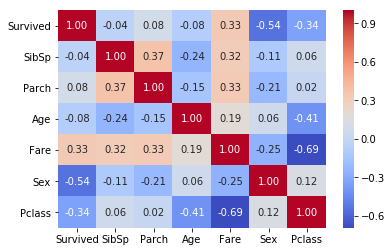

In [9]:
g = sns.heatmap(dataset[["Survived","SibSp","Parch","Age","Fare","Sex","Pclass"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm") 
# поиск зависимостей между переменными

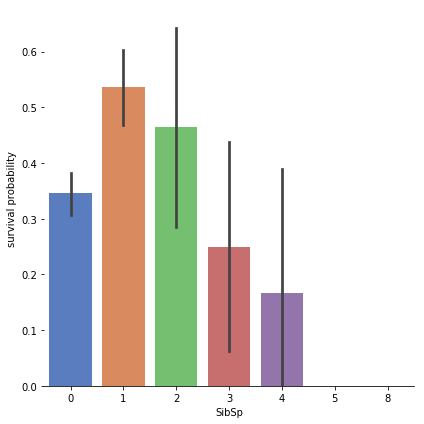

In [3]:
warnings.filterwarnings("ignore")
g = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
# похоже, когда пассажир один или когда SibSp <=2 шансы выжить выше 


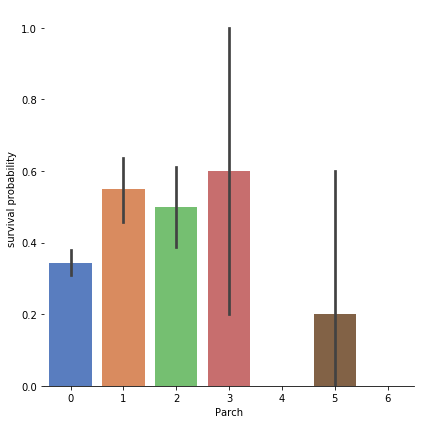

In [4]:
warnings.filterwarnings("ignore")
g  = sns.factorplot(x="Parch",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
# шансы выжить у небольших семей выше ( и у теъ кто один), 
#но при этом стандартное отклонение у семей в количестве 3 человек выосокое

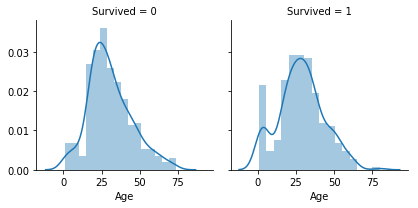

In [5]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age") 
# пассажиры с небольшим возрастом выживают чаще,  а старые пассажиры погибают 

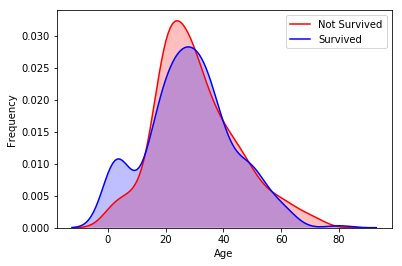

In [6]:
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"]) 
# отчетливо виден пик выживаемости у пассажиров примерно 5 лет и снижения выживаемости от 60 и до 80

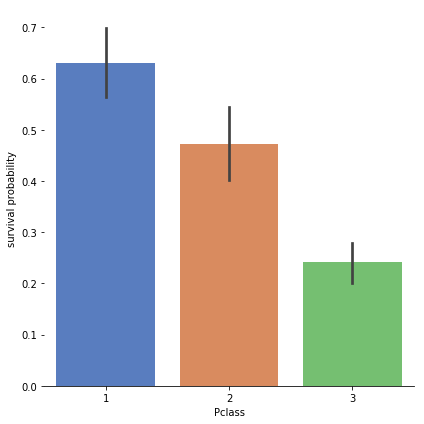

In [7]:
warnings.filterwarnings("ignore")
g = sns.factorplot(x="Pclass",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")# вероятность выжить у пассажиров первого и второго класса существенно выше 

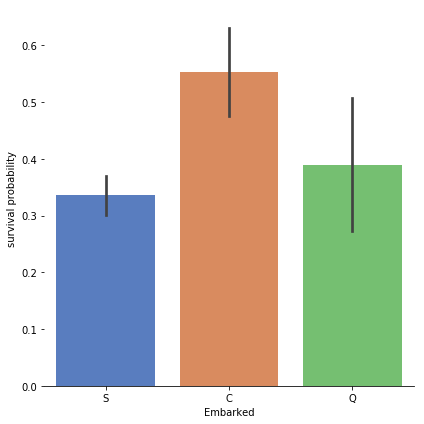

In [17]:
warnings.filterwarnings("ignore")
g = sns.factorplot(x="Embarked", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

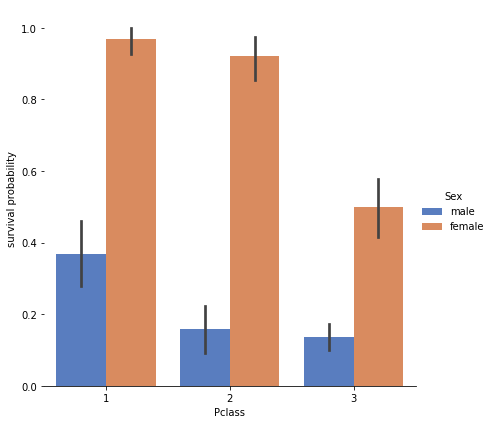

In [20]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

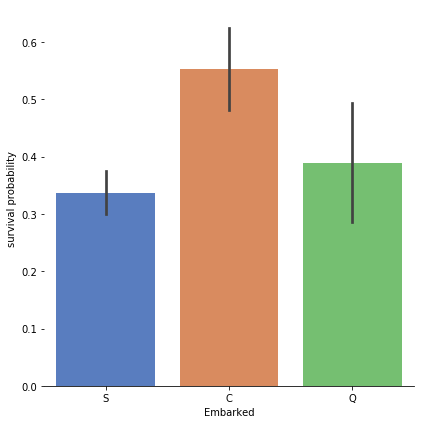

In [22]:
g = sns.factorplot(x="Embarked", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")